## Import Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import gensim
from nltk.tokenize import word_tokenize

## Loading data

In [2]:
df = pd.read_csv('/kaggle/input/feedback-prize-english-language-learning/train.csv')
#df['split'] = np.random.randn(df.shape[0], 1)

#msk = np.random.rand(len(df)) <= 0.8  ## split the data set with 0.8

#train = df[msk] ## set train set
#test = df[~msk]  ## set test set

train = df
test_extend = pd.read_csv('/kaggle/input/train-test-balanced/test.csv') ## read the test data with add some books

In [3]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
text_list = []
for i in train.full_text:
    j = word_tokenize(i)
    text_list.append(j)

In [5]:
len(text_list)

3911

In [6]:
model = gensim.models.Word2Vec(text_list, vector_size=1000, window=10,min_count=1)
#model.wv.key_to_index

In [7]:
vector_dict = {}
for word in model.wv.index_to_key: 
    vector_dict[word] = model.wv.get_vector(word)

vec_df = pd.DataFrame(vector_dict).T
vec_df = vec_df.iloc[1:, :]
vec_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
.,-0.801401,0.158988,0.066326,-1.086842,0.051997,-0.302015,0.207269,-0.006310,-0.640990,-0.143391,...,-0.180988,0.066178,-0.277397,0.505321,-0.622938,-0.338010,0.717472,0.517463,0.662337,0.927880
",",-0.069122,-0.039045,-0.349071,0.222120,0.454759,0.180238,0.484797,0.149291,0.498227,0.015089,...,-0.019732,0.044580,0.216659,0.230478,-0.396244,0.035444,0.389741,0.317497,0.139294,0.143791
the,-0.225763,0.193499,0.071178,0.677197,-0.118283,-0.280317,0.091389,-0.100634,0.284860,0.410358,...,0.280863,0.182830,-0.925023,-0.274562,0.022802,0.348659,-0.307513,0.251719,0.179312,0.074556
and,-0.659671,-0.442715,-0.374839,-0.375169,0.300743,-0.539484,0.486782,-0.166387,0.453207,0.075630,...,0.113102,-0.459318,-0.154661,0.086585,-0.038475,-0.107230,0.103236,0.076934,0.334636,-0.133821
you,0.013864,-1.089143,1.407429,0.281983,0.095519,-1.491835,0.023984,-0.484006,-0.737513,0.777063,...,-0.677135,-0.375721,0.776954,1.467816,0.060791,0.832327,0.147429,-0.652011,0.170581,-0.218644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undertan,0.004853,0.002047,-0.005013,-0.002562,0.004328,0.000381,0.005237,0.000731,0.000578,-0.002134,...,0.009730,-0.000064,0.003350,-0.004025,-0.001515,-0.005716,-0.003168,0.005836,0.004542,0.000570
Latinos,0.009615,0.000989,-0.000625,0.002764,0.002090,-0.003130,-0.000028,0.003793,-0.005614,-0.000806,...,0.002816,-0.006657,0.006144,-0.005138,0.002369,0.007455,-0.003263,-0.019858,-0.004302,-0.004969
doble,-0.002618,0.004202,-0.006257,0.003398,0.001938,0.000210,-0.000068,-0.008348,0.006616,-0.001865,...,-0.000760,0.003039,0.009395,0.004113,0.003871,-0.000311,0.006407,-0.003035,0.001169,-0.008134
neutral,0.007781,0.013281,0.009704,-0.002615,-0.002914,-0.007783,-0.001255,-0.000436,-0.004542,-0.000720,...,0.001094,0.002108,-0.005575,0.007122,-0.009094,-0.001222,0.003226,-0.005452,-0.005560,0.016259


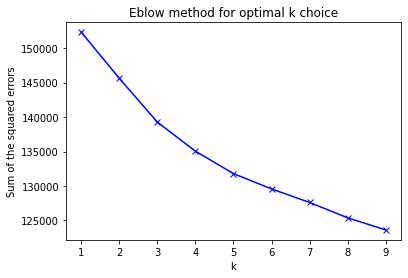

In [8]:
dict = []
# Try k for different values
##find the best k value
r = range(1, 10)
for k in r:
    #print(k)
    k_means = KMeans(n_clusters=k)
    kmean_model = k_means.fit(vec_df)
    dict.append(k_means.inertia_)
plt.plot(r, dict, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of the squared errors')
plt.title('Eblow method for optimal k choice')
plt.show()

## Train data Preprocessing

In [9]:
vocabulary_size = 3200
use_k_fold = True
target_columns = ["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]

In [10]:
train["text"] = train["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
#test["text"] = test["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
test_extend["text"] = test_extend["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
vectorizor = keras.layers.TextVectorization(
    max_tokens=vocabulary_size, 
    output_mode="tf-idf", 
    ngrams=2
)
#vectorizor.adapt(list(train["text"]) + list(test["text"]))
vectorizor.adapt(list(train["text"]) + list(test_extend["text"]))

2022-11-29 05:37:54.195844: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-29 05:37:54.470354: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


## Building Model

In [11]:
lr=0.1
batch_size=32
embedding_space_dim=200
epochs=40

In [12]:
import keras
from tensorflow.keras import optimizers
def build_model():
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(), dtype="string"))
    model.add(vectorizor)
    #model.add(keras.layers.Dense(128, activation='swish'))
    model.add(keras.layers.Dense(64, activation='softmax'))  ## change the layer dense to 32
    model.add(keras.layers.Dense(32, activation='softmax'))
    #model.add(keras.layers.Dense(16, activation='swish'))
    model.add(keras.layers.Dense(6))
    #model.add(keras.layers.Dropout(0.05))
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    return model

In [13]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 3200)              1         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 207,143
Trainable params: 207,142
Non-trainable params: 1
_________________________________________________________________


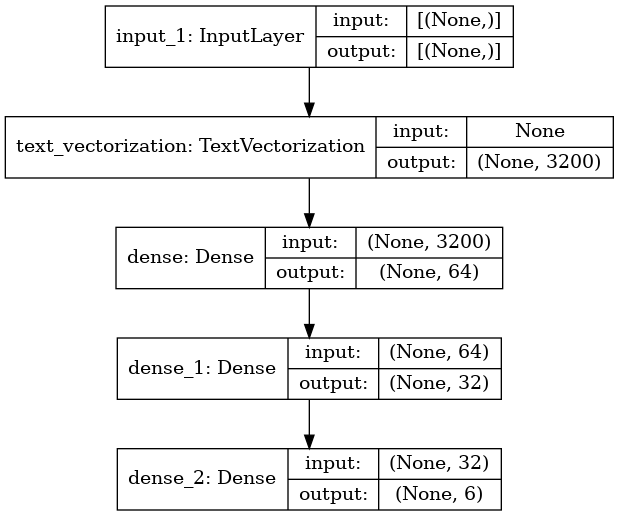

In [14]:
from tensorflow.keras.utils import plot_model
#keras.utils.plot_model(model, show_shapes=True)
plot_model(model, show_shapes=True)

## Training models

In [15]:
keras.backend.clear_session()
kfold = KFold(n_splits=5, shuffle=True, random_state=42) ## as the k means cluster results, we choose n_splits = 5
models = []
all_rmse_history = []
for i, (train_set, val_set) in enumerate(kfold.split(train)):
    x_train = train.iloc[train_set]["text"]
    y_train = train.iloc[train_set][target_columns]
    x_val = train.iloc[val_set]["text"]
    y_val = train.iloc[val_set][target_columns]
    model = build_model()
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    early_stop = keras.callbacks.EarlyStopping(monitor="val_rmse", mode="min", patience=5)
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_val, y_val),callbacks=[early_stop])
    result = model.evaluate(x_val, y_val)
    print("Loss:", result[0], "RMSE:", result[1])
    all_rmse_history.append(result[1])
    models.append(model) 
    if not use_k_fold:
        break
print(f"Mean RMSE:{np.mean(all_rmse_history)}")

Epoch 1/40
98/98 [==============================] - 3s 17ms/step - loss: 9.4032 - rmse: 3.0665 - val_loss: 8.7214 - val_rmse: 2.9532
Epoch 2/40
98/98 [==============================] - 1s 14ms/step - loss: 8.1969 - rmse: 2.8630 - val_loss: 7.5681 - val_rmse: 2.7510
Epoch 3/40
98/98 [==============================] - 1s 14ms/step - loss: 7.0754 - rmse: 2.6600 - val_loss: 6.4867 - val_rmse: 2.5469
Epoch 4/40
98/98 [==============================] - 1s 15ms/step - loss: 6.0269 - rmse: 2.4550 - val_loss: 5.4838 - val_rmse: 2.3418
Epoch 5/40
98/98 [==============================] - 1s 14ms/step - loss: 5.0701 - rmse: 2.2517 - val_loss: 4.5847 - val_rmse: 2.1412
Epoch 6/40
98/98 [==============================] - 1s 14ms/step - loss: 4.2239 - rmse: 2.0552 - val_loss: 3.8013 - val_rmse: 1.9497
Epoch 7/40
98/98 [==============================] - 1s 14ms/step - loss: 3.4958 - rmse: 1.8697 - val_loss: 3.1363 - val_rmse: 1.7710
Epoch 8/40
98/98 [==============================] - 1s 14ms/step - lo

## Predict for Test dataset

In [16]:
"""
preds = []
for model in models:
    preds.append(model.predict(test["text"]))
pred = np.mean(preds, axis=0)
output = pd.DataFrame({
    "text_id": test["text_id"]
})
#print(output)
for i in range(len(target_columns)):
    column = target_columns[i]
    #print(column)
    output[column] = pred[:,i]
pred = np.mean(preds, axis=0)
output.to_csv("output.csv", index=False)
"""

'\npreds = []\nfor model in models:\n    preds.append(model.predict(test["text"]))\npred = np.mean(preds, axis=0)\noutput = pd.DataFrame({\n    "text_id": test["text_id"]\n})\n#print(output)\nfor i in range(len(target_columns)):\n    column = target_columns[i]\n    #print(column)\n    output[column] = pred[:,i]\npred = np.mean(preds, axis=0)\noutput.to_csv("output.csv", index=False)\n'

In [17]:
#test

In [18]:
#output

### Test for test set with students and famous book

In [19]:
pred1 = []
for model in models:
    pred1.append(model.predict(test_extend["text"]))
predict = np.mean(pred1, axis=0)
output_test = pd.DataFrame({
    "text_id": test_extend["text_id"]
})
for i in range(len(target_columns)):
    columns = target_columns[i]
    #print(column)
    output_test[columns] = predict[:,i]
predict = np.mean(pred1, axis=0)
output_test.to_csv("output_test.csv", index=False)


In [20]:
output_test

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.187769,3.078797,3.292012,3.169078,3.086803,3.127915
1,000BAD50D026,2.715027,2.615334,2.828550,2.682596,2.582329,2.658455
2,00367BB2546B,3.341660,3.241316,3.436736,3.341970,3.268790,3.300091
3,hp,2.846947,2.752846,2.957057,2.827790,2.736906,2.802465
4,tkm,2.690755,2.592758,2.805669,2.658253,2.557466,2.637393
5,va,2.621726,2.529442,2.738825,2.587236,2.484619,2.570961
6,ll,2.856596,2.763593,2.965018,2.839520,2.748824,2.814398
7,sp,2.555759,2.468516,2.673186,2.518238,2.412325,2.502631
8,bp,2.555941,2.468686,2.673369,2.518430,2.412528,2.502824
